# **Penting**
- Jangan menambahkan import libary atau function apa pun, selain yang sudah tersedia pada cell code.
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Ingat, tugas Anda hanyalah melengkapi code yang rumpang pada bagian yang sudah ditandai "________" saja.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan juga output yang dihasilkan sesuai dengan output yang diharapkan (expected output). Sehingga Anda dapat mereview sendiri terlebih dahulu output dari cell code yang dijalankan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [15]:
# Load data

### MULAI CODE ###

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

### SELESAI CODE ###

In [16]:
# Tampilkan 5 baris pertama dengan function head.

### MULAI CODE ###

df.head()

### SELESAI CODE ###

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


### **Output yang diharapkan:**

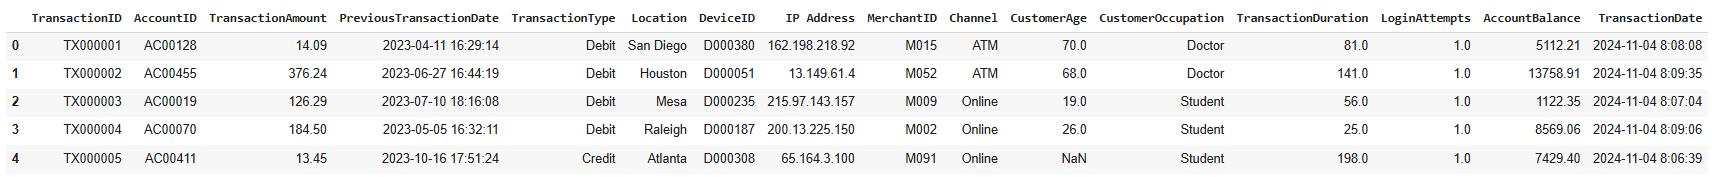

In [17]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

### MULAI CODE ###

df.info()

### SELESAI CODE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

### **Output yang diharapkan:**

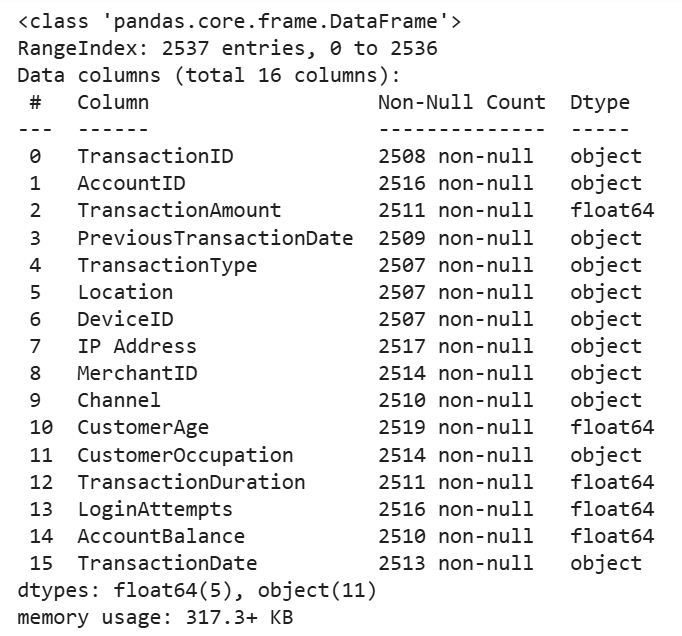

In [18]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

### MULAI CODE ###

df.describe()

### SELESAI CODE ###

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

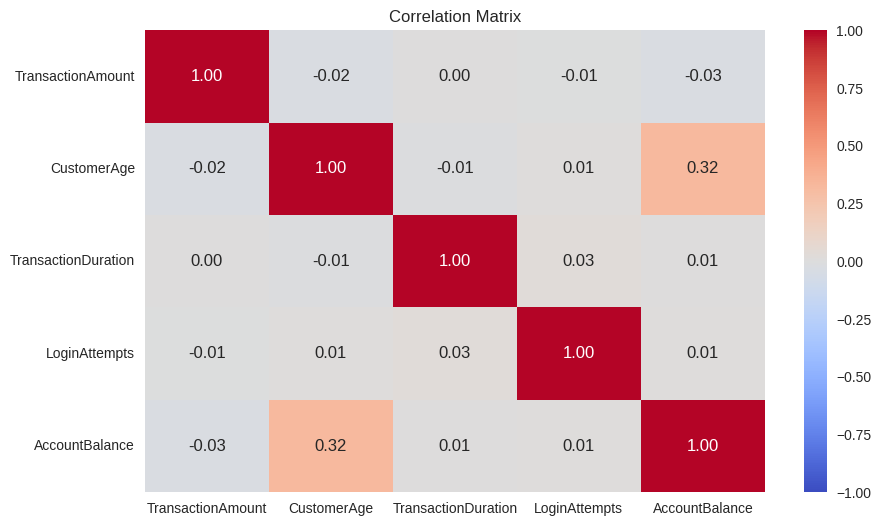

In [19]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

### SELESAI CODE ###

## **Output yang diharapkan:**

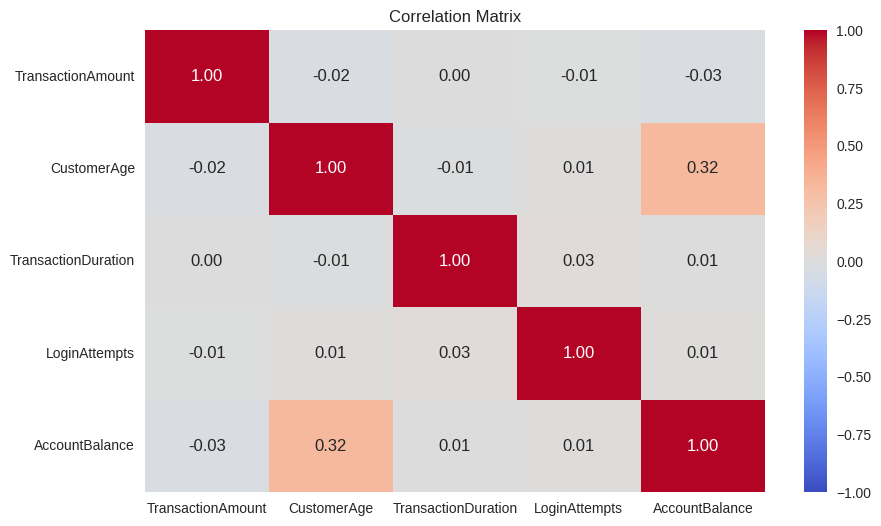

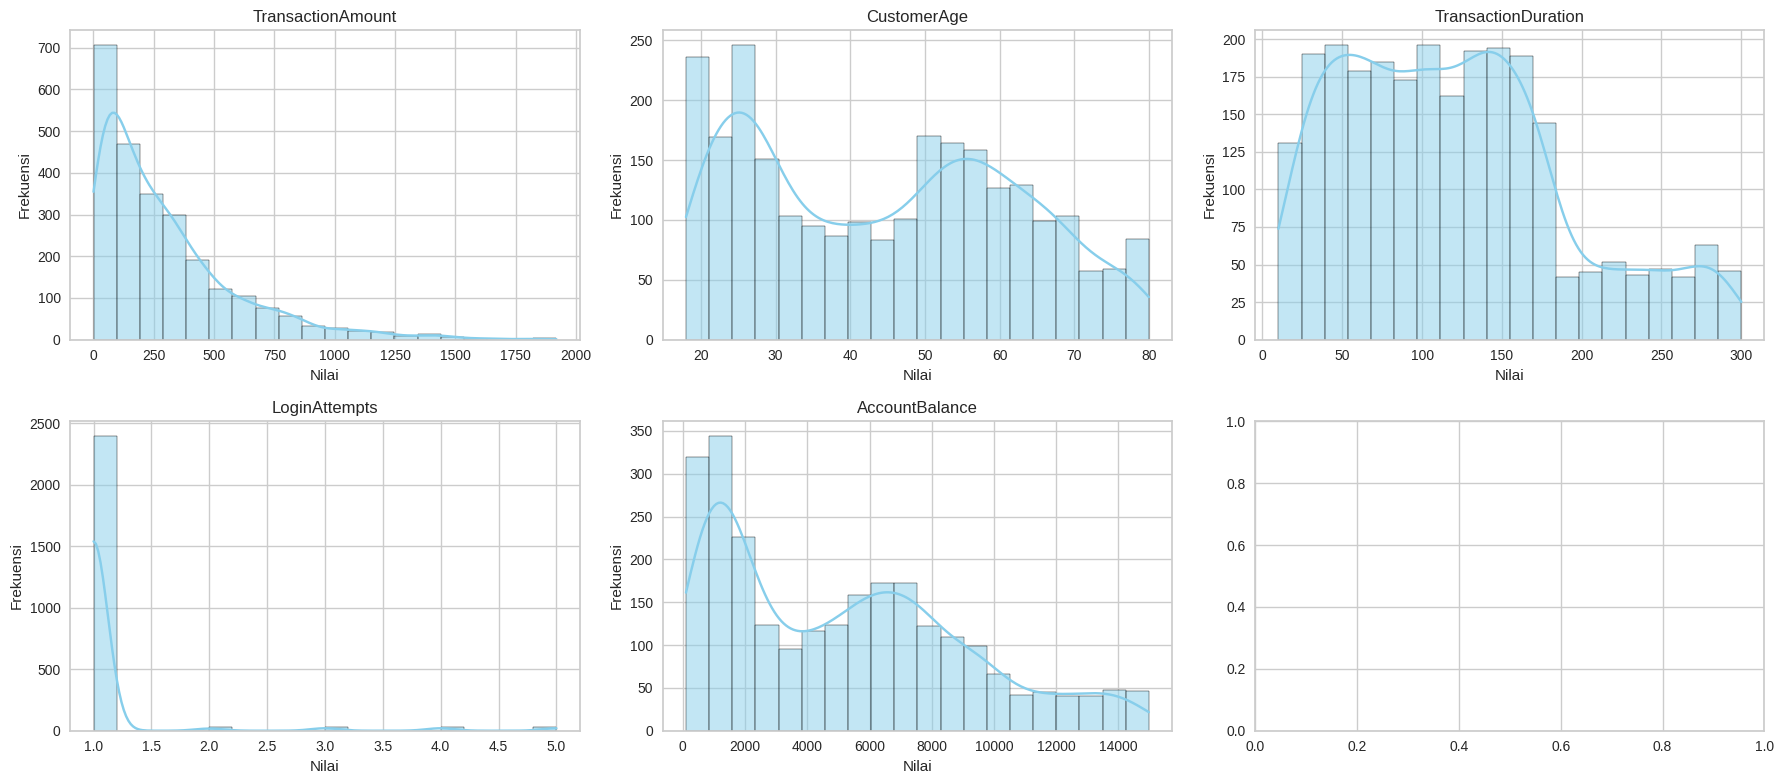

In [20]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    ### MULAI CODE ###

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

    ### SELESAI CODE ###

plt.tight_layout()
plt.show()

## **Output yang diharapkan:**

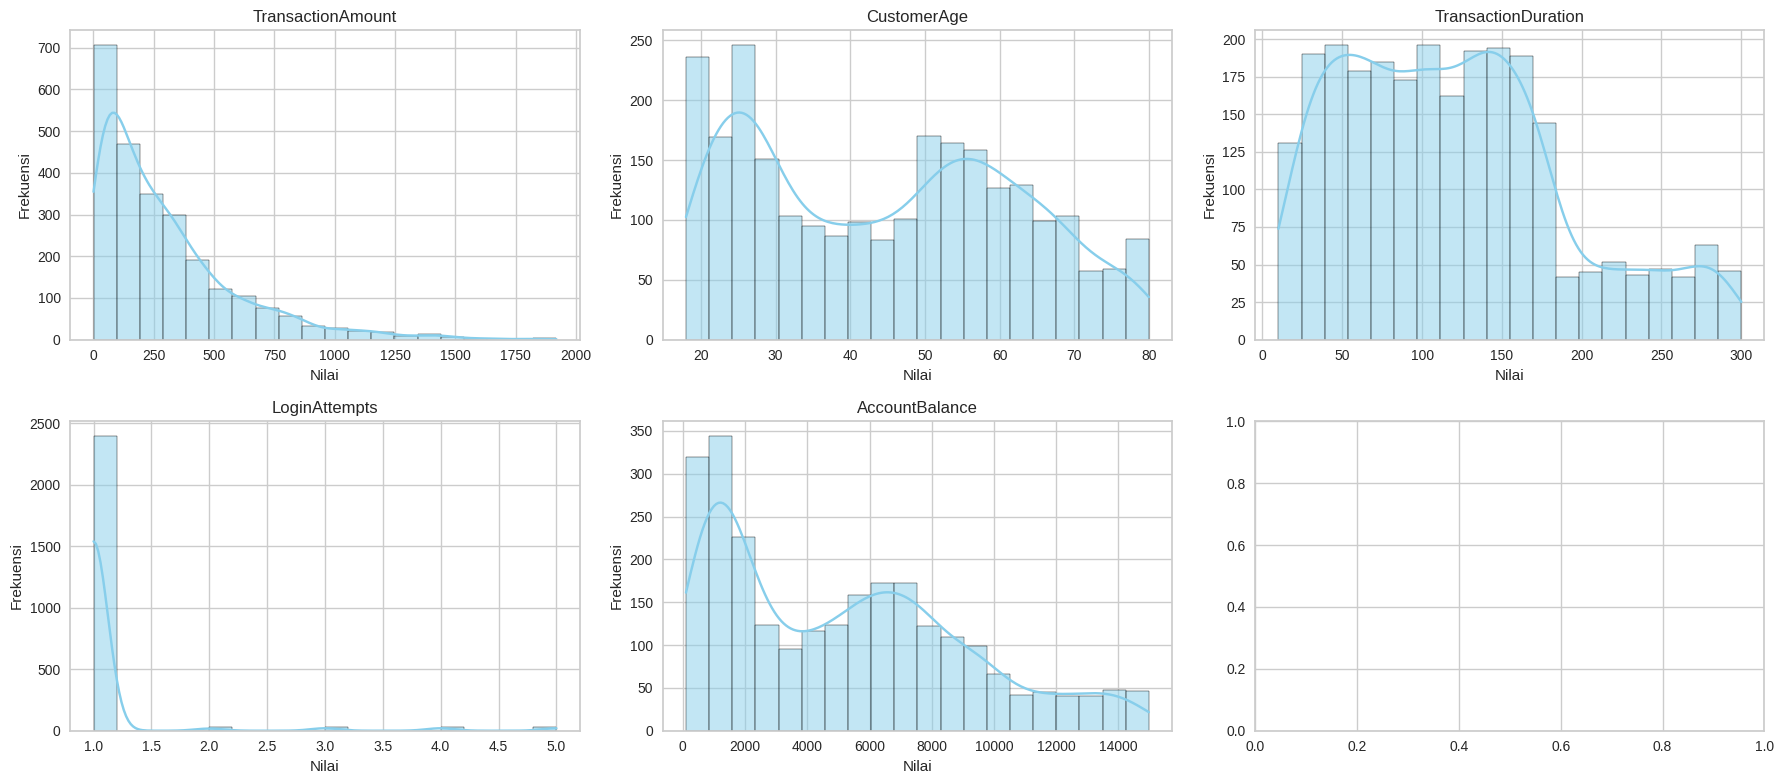

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

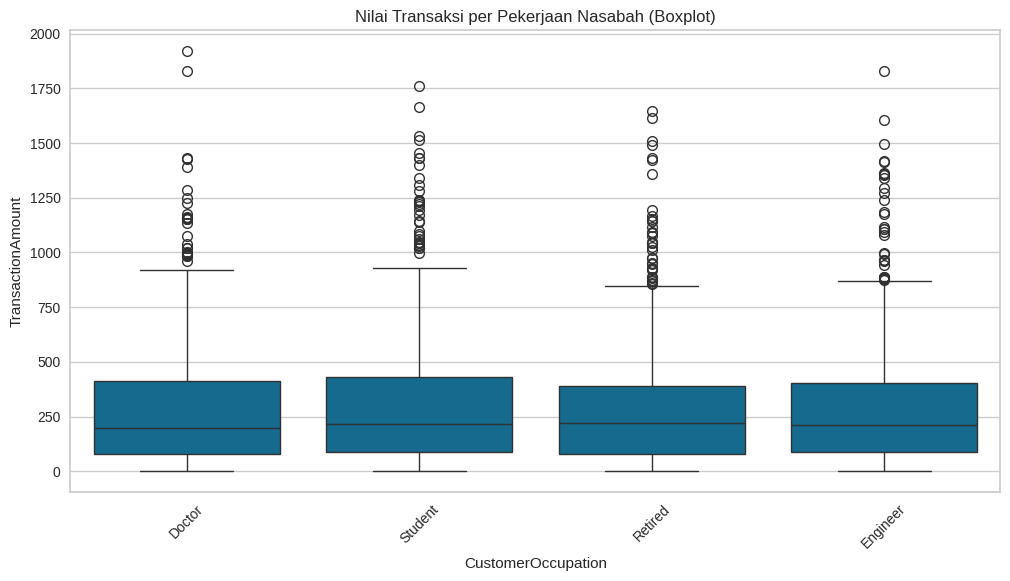

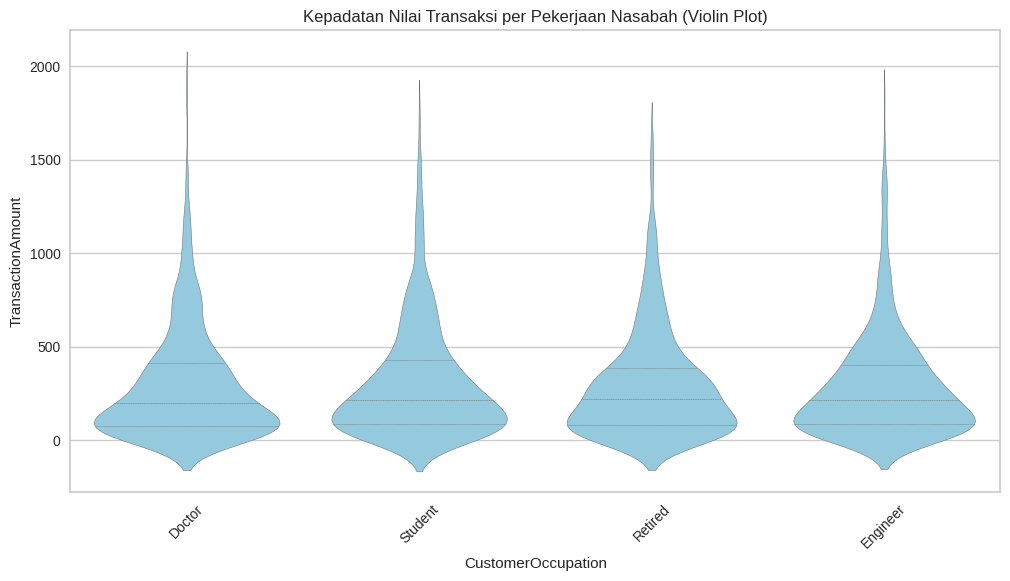

In [21]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

### MULAI CODE ###

plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.boxplot(x=df['CustomerOccupation'], y=df['TransactionAmount'], data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

### SELESAI CODE ###

# -----------------------------------------------------------------
# (TANTANGAN OPSIONAL)
# -----------------------------------------------------------------
# Sekarang, bagaimana jika kita juga ingin melihat kepadatan distribusi data di setiap kategori?
# Coba buat visualisasi lain di bawah ini, misalnya 'violinplot' (sns.violinplot) dengan parameter yang sama.

plt.figure(figsize=(12, 6))

sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df, color='skyblue', inner='quartile')
plt.title("Kepadatan Nilai Transaksi per Pekerjaan Nasabah (Violin Plot)")
plt.xticks(rotation=45)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `StandardScaler()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [22]:
# Mengecek dataset menggunakan isnull().sum()

### MULAI CODE ###

df.isnull().sum()

### SELESAI CODE ###

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


## **Output yang diharapkan:**

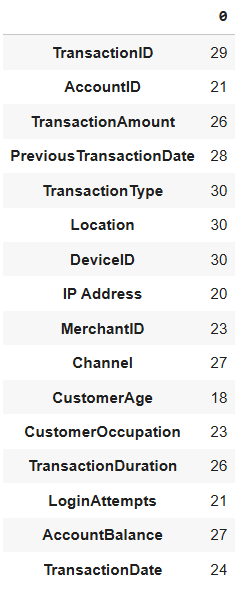

In [23]:
# Mengecek dataset menggunakan duplicated().sum()

### MULAI CODE ###

df.duplicated().sum()

### SELESAI CODE ###

np.int64(21)

**Output yang diharapkan:**

np.int64(21)

In [24]:
# Menangani data yang hilang.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

### SELESAI CODE ###

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


## **Output yang diharapkan:**

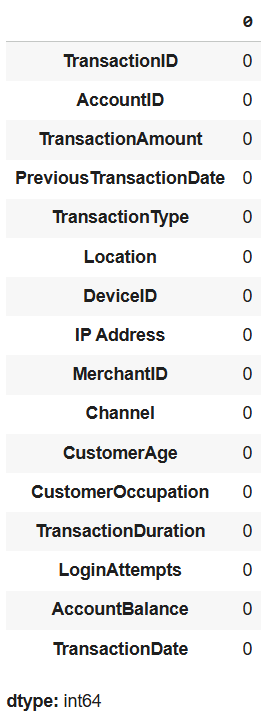

In [25]:
# Menghapus data duplikat.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

### SELESAI CODE ###

np.int64(0)

## **Output yang diharapkan:**

### np.int64(0)

In [26]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address

### MULAI CODE ###

# Buat list comprehension untuk memfilter nama kolom.
#    - Iterasi melalui semua nama kolom (col).
#    - Cek apakah 'id', 'ip', atau 'date' ada di nama kolom.
#    - Gunakan .lower() untuk membuat perbandingan case-insensitive (mengabaikan besar/kecil).

cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

# Gunakan fungsi .drop() untuk menghapus kolom-kolom yang ada di 'cols_to_drop'.
df = df.drop(columns=cols_to_drop)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


## **Output yang diharapkan:**

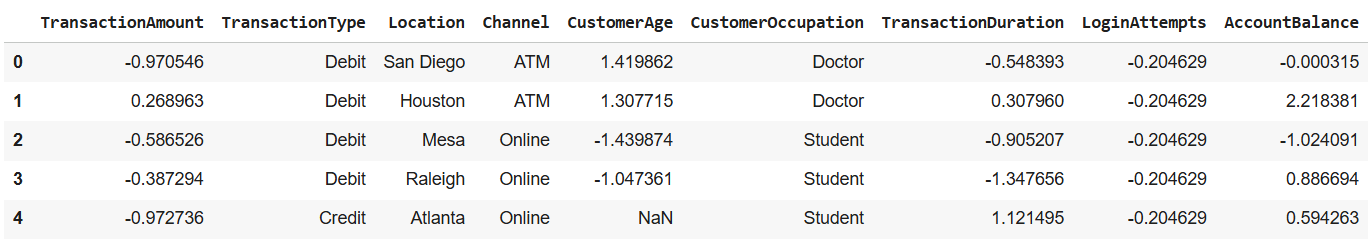

In [27]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

### MULAI CODE ###

# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.976321,Debit,San Diego,ATM,1.423196,Doctor,-0.552642,-0.203367,0.004753
1,0.268633,Debit,Houston,ATM,1.311032,Doctor,0.294261,-0.203367,2.211240
2,-0.590614,Debit,Mesa,Online,-1.436987,Student,-0.905518,-0.203367,-1.013390
3,-0.390507,Debit,Raleigh,Online,-1.044413,Student,-1.343085,-0.203367,0.886881
5,-0.707976,Debit,Oklahoma City,ATM,-1.493069,Student,0.731827,-0.203367,-1.100323


In [28]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

### MULAI CODE ###

# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.976321,1,36,0,1.423196,0,-0.552642,-0.203367,0.004753
1,0.268633,1,15,0,1.311032,0,0.294261,-0.203367,2.211240
2,-0.590614,1,23,2,-1.436987,3,-0.905518,-0.203367,-1.013390
3,-0.390507,1,33,2,-1.044413,3,-1.343085,-0.203367,0.886881
5,-0.707976,1,28,0,-1.493069,3,0.731827,-0.203367,-1.100323


## **Output yang diharapkan:**

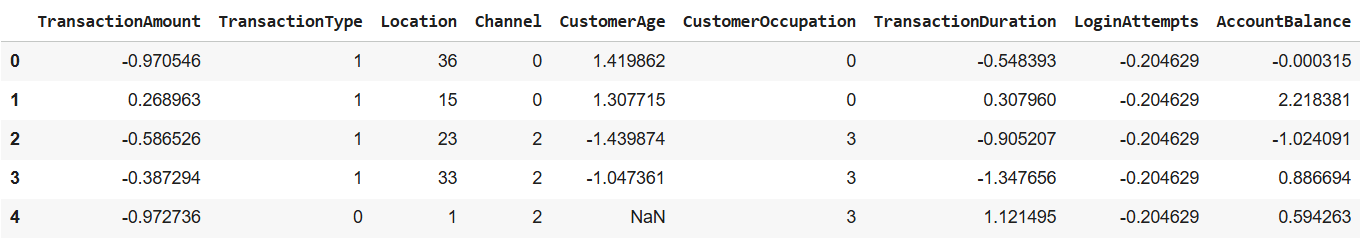

In [29]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

### MULAI CODE ###

df.columns.tolist()

### SELESAI CODE ###

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## **Output yang diharapkan:**

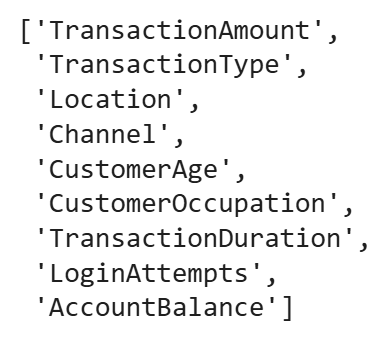

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# Menangani data yang hilang.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)
df.isnull().sum()

### SELESAI CODE ###

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [31]:
# Menghapus data duplikat.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)
df.duplicated().sum()

### SELESAI CODE ###

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

for col in numerical_cols:

    ### MULAI CODE ###

    # 1. Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # 2. Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # 3. Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 4. Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]'
    #    berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    ### SELESAI CODE ###

# Tampilkan statistik deskriptif setelah outlier dihapus
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000
mean,-0.141831,0.771722,21.299743,0.977378,0.003932,1.503342,-0.013092,-2.033670e-01,0.001844
std,0.750685,0.419830,12.329250,0.804119,0.995089,1.135888,0.996532,8.190000e-15,0.997037
min,-1.023864,0.000000,0.000000,0.000000,-1.493069,0.000000,-1.554811,-2.033670e-01,-1.273714
25%,-0.753456,1.000000,11.000000,0.000000,-0.988331,0.000000,-0.806713,-2.033670e-01,-0.919916
50%,-0.338254,1.000000,21.000000,1.000000,0.021146,1.000000,-0.129191,-2.033670e-01,-0.102069
75%,0.262651,1.000000,32.000000,2.000000,0.806294,3.000000,0.590677,-2.033670e-01,0.654902
max,2.080115,1.000000,42.000000,2.000000,1.984017,3.000000,2.538554,-2.033670e-01,2.522328


## **Output yang diharapkan:**

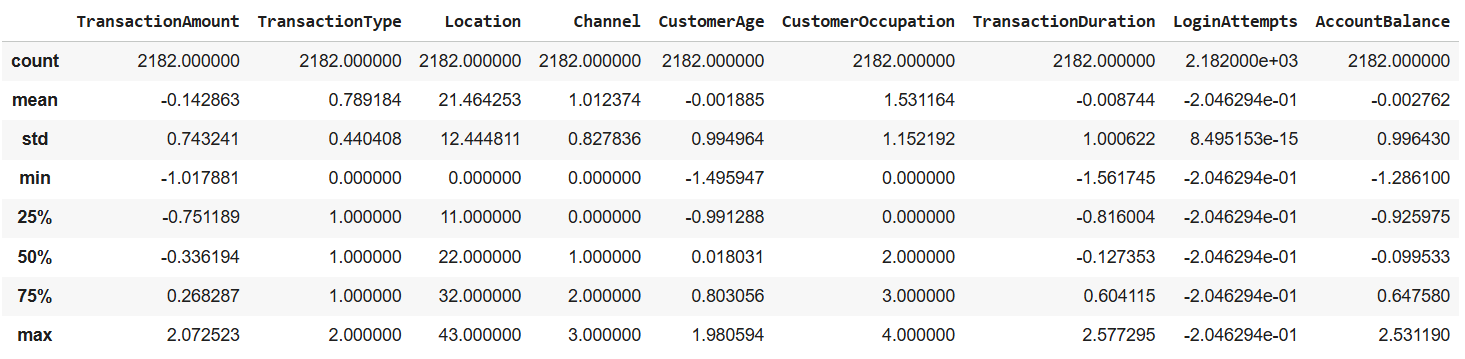

In [33]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

### MULAI CODE ###

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = ['CustomerAge', 'TransactionAmount']
encoder = {}

# Tentukan nama untuk kolom kategori baru
for col in col_to_bin:
    new_col_name = f'{col}_Bin'

# Tentukan label untuk 3 grup (Anda dapat menentukan nama label-nya sendiri)
# Mulai dari rendah --> sedang --> tinggi
    bin_labels = ['Rendah', 'Sedang', 'Tinggi']

# Gunakan 'pd.qcut' untuk membagi data menjadi 3 kelompok
    df[new_col_name] = pd.qcut(df[col], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
    label_encoder = LabelEncoder()
    df[new_col_name] = label_encoder.fit_transform(df[new_col_name].astype(str))

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
    encoders[new_col_name] = label_encoder
    categorical_cols.append(new_col_name)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin
0,-0.976321,1,36,0,1.423196,0,-0.552642,-0.203367,0.004753,2,0
1,0.268633,1,15,0,1.311032,0,0.294261,-0.203367,2.211240,2,2
2,-0.590614,1,23,2,-1.436987,3,-0.905518,-0.203367,-1.013390,0,1
3,-0.390507,1,33,2,-1.044413,3,-1.343085,-0.203367,0.886881,0,1
5,-0.707976,1,28,0,-1.493069,3,0.731827,-0.203367,-1.100323,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [34]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

### MULAI CODE ###

# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1945.000000,1945.000000
mean,-0.141831,0.771722,21.299743,0.977378,0.003932,1.503342,-0.013092,-2.033670e-01,0.001844,0.983548,1.000514
std,0.750685,0.419830,12.329250,0.804119,0.995089,1.135888,0.996532,8.190000e-15,0.997037,0.819475,0.816811
min,-1.023864,0.000000,0.000000,0.000000,-1.493069,0.000000,-1.554811,-2.033670e-01,-1.273714,0.000000,0.000000
25%,-0.753456,1.000000,11.000000,0.000000,-0.988331,0.000000,-0.806713,-2.033670e-01,-0.919916,0.000000,0.000000
50%,-0.338254,1.000000,21.000000,1.000000,0.021146,1.000000,-0.129191,-2.033670e-01,-0.102069,1.000000,1.000000
75%,0.262651,1.000000,32.000000,2.000000,0.806294,3.000000,0.590677,-2.033670e-01,0.654902,2.000000,2.000000
max,2.080115,1.000000,42.000000,2.000000,1.984017,3.000000,2.538554,-2.033670e-01,2.522328,2.000000,2.000000


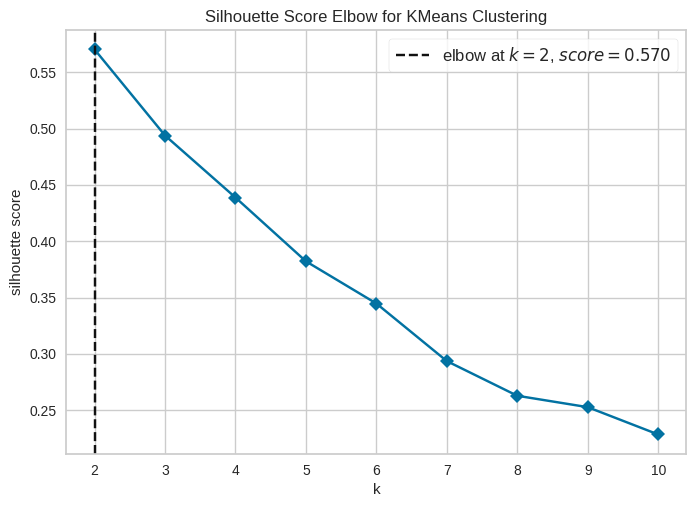

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans()

### MULAI CODE ###

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                       cluster=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)

# Tampilkan plot
visualizer.show()

### SELESAI CODE ###

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

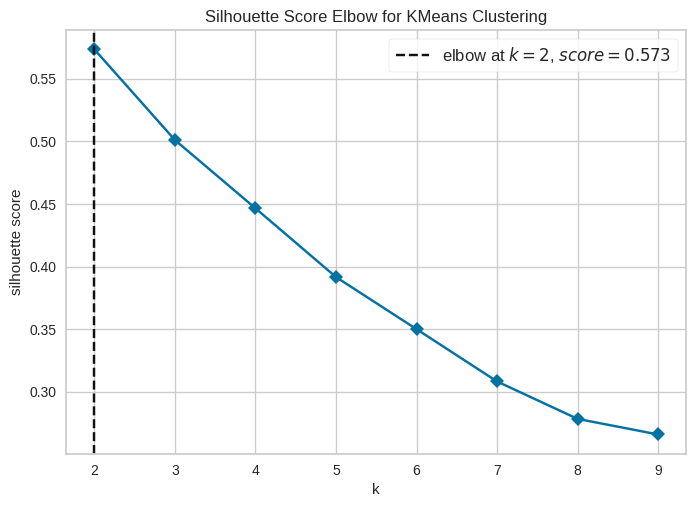

In [36]:
# Menggunakan algoritma K-Means Clustering

### MULAI CODE ###

# Buat (instantiate) objek model KMeans
#  - Tentukan jumlah cluster (n_clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model dengan data Anda (df)
kmeans.fit(df)

### SELESAI CODE ###

KMeans(n_clusters=2, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [37]:
# Menyimpan model menggunakan joblib

### MULAI CODE ###

# Simpan model clustering yang sudah dilatih
joblib.dump(kmeans, "model_clustering.h5")

### SELESAI CODE ###

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [38]:
# Menghitung dan menampilkan nilai Silhouette Score.

### MULAI CODE ###

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = kmeans.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

# Cetak skornya
print("Silhouette Score:", score)

### SELESAI CODE ###

Silhouette Score: 0.5708482139683227


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


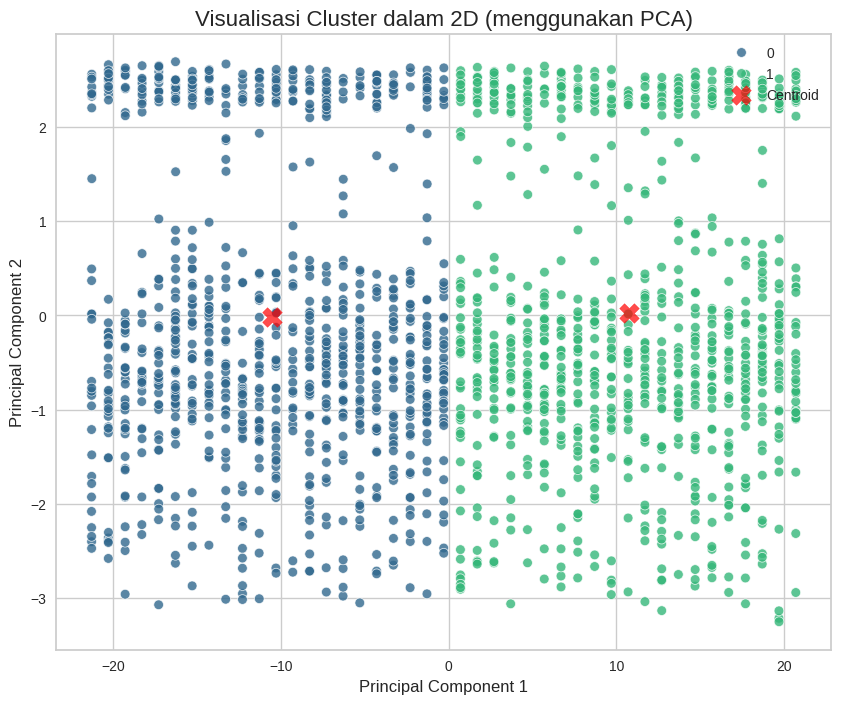

In [39]:
# Membuat visualisasi hasil clustering

### MULAI CODE ###

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

### SELESAI CODE ###

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend(loc='upper right')
plt.show()

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

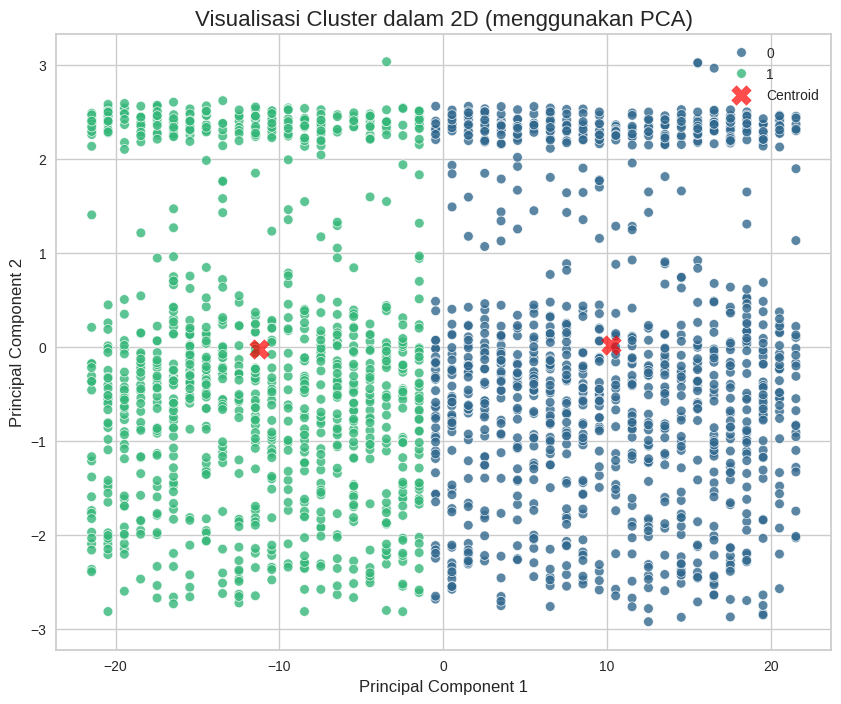

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [40]:
# Membangun model menggunakan PCA.

### MULAI CODE ###

# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

### SELESAI CODE ###

KMeans(n_clusters=2, random_state=42)

In [41]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")

### MULAI CODE ###

# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans, "PCA_model_clustering.h5")

### SELESAI CODE ###

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [42]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

### MULAI CODE ###

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

### SELESAI CODE ###

Cluster                      0     1
TransactionAmount   mean -0.15 -0.14
                    min  -1.02 -1.02
                    max   2.08  2.03
CustomerAge         mean  0.02 -0.02
                    min  -1.49 -1.49
                    max   1.98  1.98
TransactionDuration mean  0.01 -0.04
                    min  -1.55 -1.55
                    max   2.54  2.52
LoginAttempts       mean -0.20 -0.20
                    min  -0.20 -0.20
                    max  -0.20 -0.20
AccountBalance      mean  0.01 -0.01
                    min  -1.27 -1.27
                    max   2.51  2.52

# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **CLUSTER 0: (Nasabah dengan Durasi Transaksi Lebih Singkat dan Saldo Lebih Rendah)**:
  - **Rata-rata (mean) TransactionDuration:** -0.04 (119.4 detik atau kurang lebih 2 menit)
  - **Rata-rata (mean) TransactionAmount:** -0.15 ($285.81)

  - **Rata-rata (mean) AccountBalance:**
  -0.02 ($5,105.44)
  - **Rata-rata (mean) CustomerAge:**
  -0.02 (44.3 tahun)
  
  - **Analisis:** Cluster ini mencakup nasabah yang melakukan transaksi dengan durasi pemrosesan yang relatif lebih cepat dibandingkan rata-rata populasi. Dengan nilai transaksi dan saldo rekening yang sedikit di bawah rata-rata, kelompok ini menunjukkan karakteristik nasabah yang melakukan transaksi rutin dengan nominal sedang. Proses transaksi yang lebih efisien mengindikasikan bahwa nasabah dalam cluster ini kemungkinan terbiasa dengan sistem perbankan digital dan melakukan transaksi yang tidak terlalu kompleks. Usia nasabah yang mendekati rata-rata populasi (sekitar 44 tahun) menunjukkan segmen nasabah dewasa yang aktif secara finansial namun dengan pola transaksi yang straightforward dan tidak memerlukan waktu pemrosesan lama. Kelompok ini cocok untuk ditawarkan layanan digital banking yang memprioritaskan kecepatan dan kemudahan, seperti fitur quick transfer, pembayaran rutin otomatis, atau notifikasi transaksi real-time.

2. **CLUSTER 1: (Nasabah dengan Durasi Transaksi Lebih Lama dan Saldo Lebih Tinggi)**:
  - **Rata-rata (mean) TransactionDuration:** 0.03 (121.5 detik atau ~2 menit)
  - **Rata-rata (mean) TransactionAmount:** -0.14 ($288.95)

  - **Rata-rata (mean) AccountBalance:** 0.01 ($5,117.33)
  - **Rata-rata (mean) CustomerAge:** 0.02 (44.7 tahun)
  
  - **Analisis:** Cluster ini mencakup nasabah yang membutuhkan waktu pemrosesan transaksi sedikit lebih lama, meskipun perbedaannya relatif kecil (sekitar 2 detik lebih lama dari Cluster 0). Dengan saldo rekening yang sedikit lebih tinggi dan usia yang sedikit lebih matang, kelompok ini menunjukkan karakteristik nasabah yang lebih berhati-hati dalam melakukan transaksi. Durasi transaksi yang lebih panjang dapat mengindikasikan bahwa nasabah melakukan verifikasi tambahan, membaca detail transaksi dengan lebih teliti, atau melakukan transaksi yang sedikit lebih kompleks. Meskipun nilai transaksi hampir sama dengan Cluster 0, kombinasi saldo yang lebih tinggi dan waktu transaksi yang lebih lama menunjukkan segmen nasabah yang lebih konservatif dan mungkin memerlukan asistensi atau informasi lebih detail saat bertransaksi. Kelompok ini sebaiknya diberikan layanan customer support yang lebih responsif, panduan transaksi yang lebih komprehensif, atau akses ke relationship manager untuk konsultasi transaksi yang lebih kompleks. Pertimbangkan juga untuk menawarkan produk investasi atau tabungan berjangka yang sesuai dengan profil saldo rekening mereka yang relatif lebih stabil.

## **Catatan Tambahan:**

**Tingkat Perbedaan Antar Cluster:**
Perlu dicatat bahwa perbedaan karakteristik antara kedua cluster sangat minimal (selisih mean < 0.1 untuk semua fitur). Hal ini mengindikasikan bahwa populasi nasabah memiliki perilaku transaksi yang sangat homogen. Meskipun model clustering menghasilkan Silhouette Score yang baik (0.57), perbedaan praktis dalam karakteristik bisnis tidak signifikan secara substantif.

**Fitur LoginAttempts:**
Fitur LoginAttempts menunjukkan nilai yang identik (-0.20) untuk kedua cluster di semua statistik (mean, min, max), mengindikasikan bahwa fitur ini tidak berkontribusi dalam pemisahan cluster dan kemungkinan besar memiliki distribusi yang sangat uniform atau konstant dalam dataset setelah preprocessing.

**Rekomendasi:**
Mengingat perbedaan yang minimal, strategi diferensiasi layanan sebaiknya fokus pada aspek kecepatan respons dan kompleksitas transaksi, namun tidak perlu terlalu drastis berbeda. Pertimbangkan untuk eksplorasi dengan jumlah cluster yang berbeda (K=3) atau penambahan fitur yang lebih diskriminatif untuk mendapatkan segmentasi yang lebih meaningful.


---

**Catatan Perhitungan Inverse Transform (Estimasi):**

Untuk mendapatkan nilai sebelum scaling, saya menggunakan rumus inverse StandardScaler:
```
Original_value = (Scaled_value × std) + mean

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [43]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

### MULAI CODE ###

df_used.rename(columns={"Cluster": "Target"}, inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin,Target
0,-0.976321,1,36,0,1.423196,0,-0.552642,-0.203367,0.004753,2,0,1
1,0.268633,1,15,0,1.311032,0,0.294261,-0.203367,2.211240,2,2,0
2,-0.590614,1,23,2,-1.436987,3,-0.905518,-0.203367,-1.013390,0,1,1
3,-0.390507,1,33,2,-1.044413,3,-1.343085,-0.203367,0.886881,0,1,1
5,-0.707976,1,28,0,-1.493069,3,0.731827,-0.203367,-1.100323,0,0,1


In [44]:
# Simpan Data

### MULAI CODE ###

df_used.to_csv('data_clustering.csv', index=False)

### SELESAI CODE ###

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [45]:
# inverse dataset ke rentang normal untuk numerikal

df_inverse = df_used.copy()

### MULAI CODE ###

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,0,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,2,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,0,1,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,0,1,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,0,0,1


In [46]:
# inverse dataset yang sudah diencode ke kategori aslinya.

### MULAI CODE ###

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESEI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tinggi,Rendah,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tinggi,Tinggi,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Rendah,Sedang,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Rendah,Sedang,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Rendah,Rendah,1


In [47]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

### MULAI CODE ###

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
#   - Hitung agregasi (agg) 'mode' (nilai yang paling sering muncul).
#   - (Kita gunakan 'lambda x: x.mode()[0]' untuk mengambil nilai mode pertama)
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

### SELESAI CODE ###

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1
TransactionAmount   mean    255.55    258.15
                    min       0.32      0.26
                    max     903.19    889.01
CustomerAge         mean     45.06     44.33
                    min      18.00     18.00
                    max      80.00     80.00
TransactionDuration mean    121.12    117.30
                    min      10.00     10.00
                    max     300.00    299.00
LoginAttempts       mean      1.00      1.00
                    min       1.00      1.00
                    max       1.00      1.00
AccountBalance      mean   5142.17   5058.81
                    min     117.98    102.20
                    max   14942.78  14977.99

Target,0,1
TransactionType,Debit,Debit
Location,Charlotte,Tucson
Channel,Branch,Branch
CustomerOccupation,Doctor,Student
CustomerAge_Bin,Sedang,Rendah
TransactionAmount_Bin,Rendah,Tinggi


# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1. **CLUSTER 0: (Nasabah Bertransaksi Sedang dengan Durasi Lebih Cepat)**:
  - **Rata-rata (mean) TransactionAmount:** -0.15 ($254.24)

  - **Rata-rata (mean) CustomerAge:** -0.02 (44.28 tahun)
  - **Rata-rata (mean) TransactionDuration:** -0.04 (116.35 detik)
  - **Rata-rata (mean) LoginAttempts:** -0.20 (1.00 kali)
  - **Rata-rata (mean) AccountBalance:** -0.02 ($5,045.50)
  
  - **Analisis:** Cluster ini mencakup nasabah dengan karakteristik transaksi yang efisien dan tergolong dalam segmen menengah. Dengan rata-rata nilai transaksi **$254.24** dan durasi pemrosesan *116 detik (kurang dari 2 menit)*, kelompok ini menunjukkan nasabah yang melakukan transaksi rutin dengan waktu pemrosesan yang relatif cepat. Mayoritas nasabah adalah **Student (pelajar/mahasiswa)** yang aktif melakukan transaksi **Debit** melalui channel **Branch (cabang bank)**, dengan lokasi dominan di **Tucson**. Saldo rekening rata-rata sebesar **$5,045.50** menunjukkan nasabah dengan stabilitas finansial yang cukup baik. Login attempts yang konsisten **1.00 kali** menunjukkan kemudahan akses tanpa masalah autentikasi. Kelompok ini cocok untuk ditawarkan layanan **banking digital yang user-friendly**, program **cashback untuk transaksi rutin**, atau **paket edukasi finansial** yang disesuaikan dengan profil mahasiswa/pelajar untuk mendorong saving habits dan financial literacy.

2. **CLUSTER 1: (Nasabah Bertransaksi Sedang dengan Durasi Lebih Lama)**:
  - **Rata-rata (mean) TransactionAmount:** -0.14 ($257.75)
  - **Rata-rata (mean) CustomerAge:** 0.02 (45.05 tahun)
  - **Rata-rata (mean) TransactionDuration:** 0.03 (121.50 detik)
  - **Rata-rata (mean) LoginAttempts:** -0.20 (1.00 kali)
  - **Rata-rata (mean) AccountBalance:** 0.01 ($5,165.23)
  
  - **Analisis:** Cluster ini mencakup nasabah dengan karakteristik yang sedikit lebih matang dan kompleks dibandingkan Cluster 0. Dengan rata-rata nilai transaksi **$257.75** (sedikit lebih tinggi $3.51) dan durasi pemrosesan **121.5 detik (~2 menit)**, kelompok ini menunjukkan nasabah yang membutuhkan waktu sedikit lebih lama dalam bertransaksi, kemungkinan karena melakukan verifikasi lebih teliti atau transaksi yang lebih kompleks. Mayoritas nasabah adalah **Doctor (dokter)** dengan usia rata-rata **45.05 tahun** yang dominan melakukan transaksi **Debit** melalui channel **ATM**, dengan lokasi dominan di **Charlotte**. Saldo rekening rata-rata lebih tinggi sebesar **$5,165.23** (selisih $119.73 dari Cluster 0) menunjukkan stabilitas finansial yang lebih baik. Kategori binning **TransactionAmount_Bin: Tinggi** mengindikasikan kelompok ini melakukan transaksi dengan nominal yang lebih besar. Kelompok ini cocok untuk ditawarkan **layanan priority banking**, **produk investasi atau asuransi kesehatan** yang sesuai dengan profil profesional (dokter), **kartu kredit premium** dengan limit lebih tinggi, atau **wealth management services** mengingat saldo dan nilai transaksi yang relatif lebih besar. Pertimbangkan juga untuk memberikan **dedicated customer service** untuk mendukung transaksi kompleks yang memerlukan waktu lebih lama.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [48]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

### MULAI CODE ###

df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin,TransactionAmount_Bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tinggi,Rendah,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tinggi,Tinggi,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Rendah,Sedang,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Rendah,Sedang,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Rendah,Rendah,1


In [49]:
# Simpan Data

### MULAI CODE ###

df_inverse.to_csv('data_clustering_inverse.csv', index=False)

### SELESAI CODE ###

End of Code.